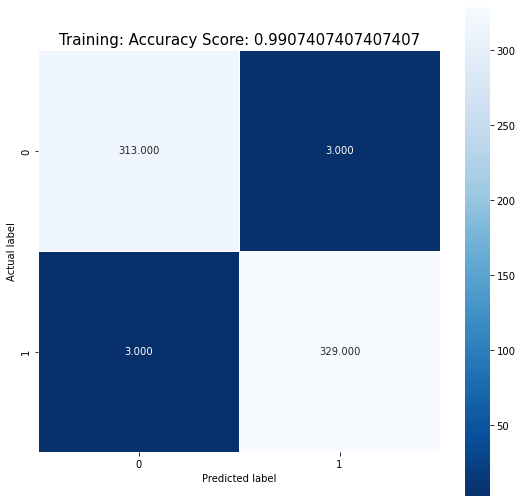

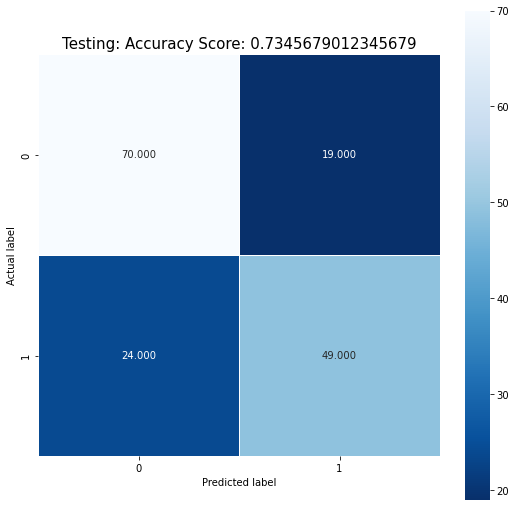

In [78]:
# training data
import pandas as pd 
df= pd.read_csv("k-fold2-train.csv")

# Data slicing
x = df.iloc[:, 0:15] #features 
y = df.iloc[:, [15]] #label

# Convert dataframe to array (Numpy)
import numpy as np

x = x.values 
y = y.values 
y = y.ravel()

# K-Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier

# Define custom weight function
def custom_weight(distances): 
    weights = np.exp(-distances) 
    return weights

# Create a k-NN classifier with custom weights
modelKnn = KNeighborsClassifier(p=2, weights=custom_weight, algorithm='brute', n_neighbors=78) 
modelKnn.fit(x, y)

yPred = modelKnn.predict(x)

# Testing & performance analysis -Trainning data
import sklearn.metrics as skm 
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.figure(figsize=(9,9)) 
sns.heatmap(skm.confusion_matrix(y, yPred), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r'); 
plt.ylabel('Actual label'); 
plt.xlabel('Predicted label'); 
all_sample_title = 'Training: Accuracy Score: {0}'.format(skm.accuracy_score(y, yPred)) 
plt.title(all_sample_title, size = 15);

# testing data
# Read data from external file
import pandas as pd 
df_test = pd.read_csv("k-fold2-test.csv")

#Data slicing 
x2 = df_test.iloc[:, 0:15] #features 
y2 = df_test.iloc[:, [15]] #label 
x2.head()

# Convert dataframe to array
x2 = x2.values 
y2 = y2.values 
y2 = y2.ravel()

yPred2 = modelKnn.predict(x2) 

# Testing & performance analysis -Testing data
import sklearn.metrics as skm 
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.figure(figsize=(9,9)) 
sns.heatmap(skm.confusion_matrix(y2, yPred2), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r'); 
plt.ylabel('Actual label'); 
plt.xlabel('Predicted label'); 
all_sample_title = 'Testing: Accuracy Score: {0}'.format(skm.accuracy_score(y2, yPred2)) 
plt.title(all_sample_title, size = 15);